In [ ]:
 '''
 Academic Integrity Statement
 "I (We) certify that the code and data in this assignment were generated independently,
 using only the tools and resources defined in the course and that I (we) did not receive
 any external help, coaching or contributions during the production of this work."
'''

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
from matplotlib.pyplot import imshow, show
import random

In [3]:
! pip install gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
grid = np.zeros((5, 5))
print(grid)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


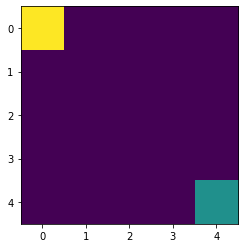

In [7]:
pos1 = [0, 0]
pos2 = [4, 4]
grid[tuple(pos1)] = 1
grid[tuple(pos2)] = 0.5
plt.imshow(grid)

# **DETERMINISTIC ENVIRONMENT**

In [8]:
class GridEnvironment(gym.Env):
    
    def __init__(self):
        self.observation_space = spaces.Discrete(9)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 5
        
    def reset(self):
        self.timestep = 0
        self.agent_pos = [0, 0]
        self.goal_pos = [4, 4]
        self.state = np.zeros((5, 5))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        observation = self.state.flatten()
        
        return observation
    
    def step(self, action):
        self.state = np.random.choice(self.observation_space.n)
        if action == 0:
            self.agent_pos[0] += 1
        if action == 1:
          self.agent_pos[0] -= 1
        if action == 2:
          self.agent_pos[1] += 1
        if action == 3:
          self.agent_pos[1] -= 1
        self.agent_pos = np.clip(self.agent_pos, 0, 4)
        self.state = np.zeros((5,5))
        self.state[tuple(self.agent_pos)] = 1
        if not (tuple(self.agent_pos) == tuple(self.goal_pos)):
            self.state[tuple(self.goal_pos)] = 0.5
        observation = self.state.flatten()
        
        reward = 0
        if (self.agent_pos == self.goal_pos).all():
            reward = 10
        elif (self.agent_pos == (2,1)).all():
            reward = 5
        elif (self.agent_pos == (1,3)).all():
            reward = 2
        elif (self.agent_pos == (3,2)).all():
            reward = -2
        elif (self.agent_pos == (0,3)).all():
            reward = -5
        elif (self.agent_pos == (4,0)).all():
            reward = 8
            
        self.timestep += 1
        done = True if self.timestep >= self.max_timesteps else False
        
        info = {}
        
        return observation, reward, done, info,self.agent_pos,self.state
    
    def render(self):
        plt.imshow(self.state)

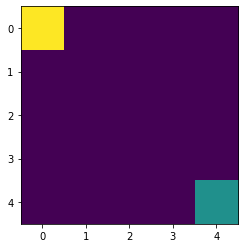

In [12]:
env = GridEnvironment()
obs = env.reset()
env.render()

The reward for the action is:  0 



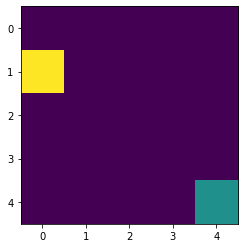

In [13]:
#Action 0 the agent moves down
action = 0
observation, reward, done, _, agent_position,state = env.step(action)
env.render()
print('The reward for the action is: ', reward,'\n')

The reward for the action is:  0 



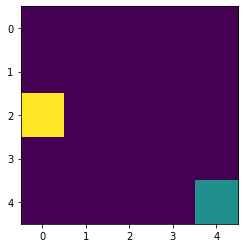

In [14]:
#Action 0 the agent moves down
action = 0
observation, reward, done, _, agent_position,state = env.step(action)
env.render()
print('The reward for the action is: ', reward,'\n')

The reward for the action is:  0 



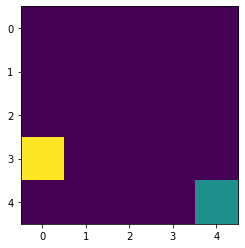

In [15]:
#Action 0 the agent moves down
action = 0
observation, reward, done, _, agent_position,state = env.step(action)
env.render()
print('The reward for the action is: ', reward,'\n')

The reward for the action is:  8 



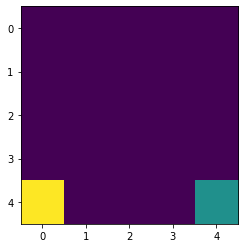

In [16]:
#Action 0 the agent moves down
action = 0
observation, reward, done, _, agent_position,state = env.step(action)
env.render()
print('The reward for the action is: ', reward,'\n')

The reward for the action is:  0 



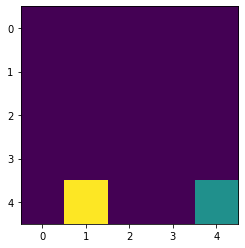

In [17]:
#Action 2 the agent moves right
action = 2
observation, reward, done, _, agent_position,state = env.step(action)
env.render()
print('The reward for the action is: ', reward,'\n')

The reward for the action is:  0 



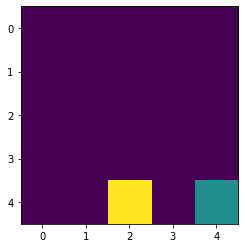

In [18]:
#Action 2 the agent moves right
action = 2
observation, reward, done, _, agent_position,state = env.step(action)
env.render()
print('The reward for the action is: ', reward,'\n')

The reward for the action is:  0 



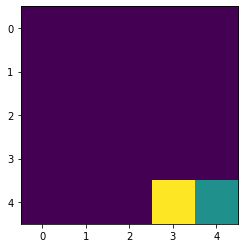

In [19]:
#Action 2 the agent moves right
action = 2
observation, reward, done, _, agent_position,state = env.step(action)
env.render()
print('The reward for the action is: ', reward,'\n')

The reward for the action is:  0 



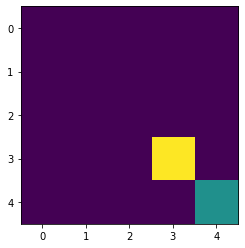

In [23]:
#Action 1 the agent moves up
action = 1
observation, reward, done, _, agent_position,state = env.step(action)
env.render()
print('The reward for the action is: ', reward,'\n')

The reward for the action is:  0 



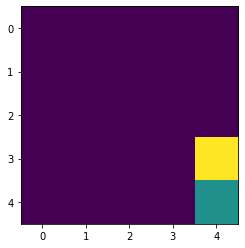

In [24]:
#Action 2 the agent moves right
action = 2
observation, reward, done, _, agent_position,state = env.step(action)
env.render()
print('The reward for the action is: ', reward,'\n')

The reward for the action is:  10 



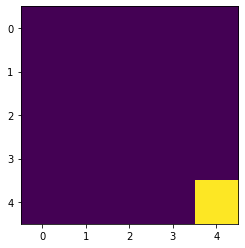

In [25]:
#Action 0 the agent moves down
action = 0
observation, reward, done, _, agent_position,state = env.step(action)
env.render()
print('The reward for the action is: ', reward,'\n')

# **STOCHASTIC ENVIRONMENT**

In [85]:
class GridEnvironment1(gym.Env):
    
    def __init__(self):
        self.observation_space = spaces.Discrete(9)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 5
        
    def reset1(self):
        self.timestep = 0
        self.agent_pos = [0, 0]
        self.goal_pos = [4, 4]
        self.state = np.zeros((5, 5))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        observation = self.state.flatten()
        
        return observation
    
    def step1(self, action):
        self.state = np.random.choice(self.observation_space.n)
        if action == 0:
          #The stochasticity of the environment is proven here by giving a major probability of 0.82 for the action0
          action = np.random.choice([0,1,2,3], 1, p=[0.82, 0.06, 0.06, 0.06])
        if action == 1:
          action = np.random.choice([0,1,2,3], 1, p=[0.06, 0.82, 0.06, 0.06])
        if action == 2:
          action = np.random.choice([0,1,2,3], 1, p=[0.06, 0.06, 0.82, 0.06])
        if action == 3:
          action = np.random.choice([0,1,2,3], 1, p=[0.06, 0.06, 0.06, 0.82])
        if action == 0:
            self.agent_pos[0] += 1
        if action == 1:
          self.agent_pos[0] -= 1
        if action == 2:
          self.agent_pos[1] += 1
        if action == 3:
          self.agent_pos[1] -= 1
        self.agent_pos = np.clip(self.agent_pos, 0, 4)
        self.state = np.zeros((5,5))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        observation = self.state.flatten()
        
        reward = 0
        if (self.agent_pos == self.goal_pos).all():
            reward = 10
        elif (self.agent_pos == (2,1)).all():
            reward = 5
        elif (self.agent_pos == (1,3)).all():
            reward = 2
        elif (self.agent_pos == (3,2)).all():
            reward = -2
        elif (self.agent_pos == (0,3)).all():
            reward = -5
        elif (self.agent_pos == (4,0)).all():
            reward = 8
            
        self.timestep += 1
        done = True if self.timestep >= self.max_timesteps else False
        
        info = {}
        
        return observation, reward, done, info,self.agent_pos,self.state
    
    def render1(self):
        plt.imshow(self.state)

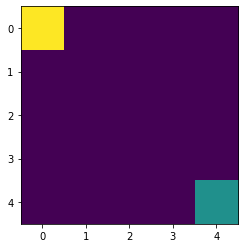

In [41]:
env = GridEnvironment1()
obs = env.reset1()
env.render1()

The reward for the action is:  0 



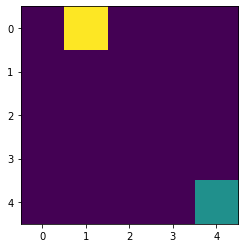

In [42]:
#Action 2 the agent moves right
action = 2
observation, reward, done, _, agent_position,state = env.step1(action)
env.render1()
print('The reward for the action is: ', reward,'\n')

The reward for the action is:  0 



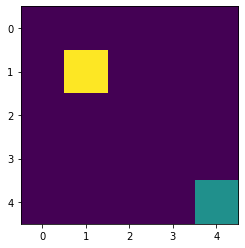

In [43]:
#Action 2 the agent moves right
#The stochastocity is evident here
#Though the action is right, the agent chose to go down
action = 0
observation, reward, done, _, agent_position,state = env.step1(action)
env.render1()
print('The reward for the action is: ', reward,'\n')

The reward for the action is:  0 



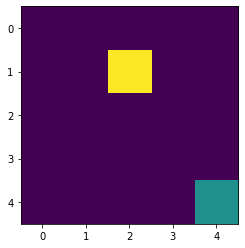

In [44]:
#Action 2 the agent moves right
action = 2
observation, reward, done, _, agent_position,state = env.step1(action)
env.render1()
print('The reward for the action is: ', reward,'\n')

The reward for the action is:  2 



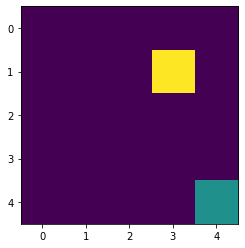

In [45]:
#Action 2 the agent moves right
action = 2
observation, reward, done, _, agent_position,state = env.step1(action)
env.render1()
print('The reward for the action is: ', reward,'\n')

The reward for the action is:  0 



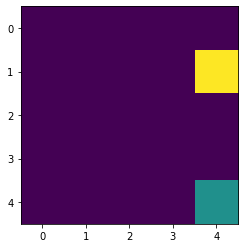

In [46]:
#Action 2 the agent moves right
action = 2
observation, reward, done, _, agent_position,state = env.step1(action)
env.render1()
print('The reward for the action is: ', reward,'\n')

The reward for the action is:  0 



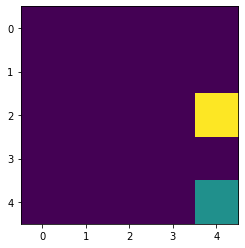

In [47]:
#Action 2 the agent moves right
#The stochastocity is evident here
#Though the action is right, the agent chose to go down
action = 0
observation, reward, done, _, agent_position,state = env.step1(action)
env.render1()
print('The reward for the action is: ', reward,'\n')

The reward for the action is:  0 



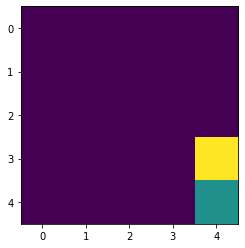

In [48]:
#Action 0 the agent moves down
action = 0
observation, reward, done, _, agent_position,state = env.step1(action)
env.render1()
print('The reward for the action is: ', reward,'\n')

The reward for the action is:  0 



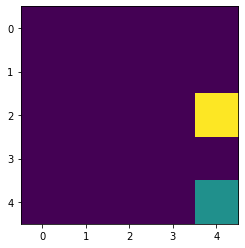

In [49]:
#The stochastocity is evident here
#Though the action is down, the agent chose to go up
action = 0
observation, reward, done, _, agent_position,state = env.step1(action)
env.render1()
print('The reward for the action is: ', reward,'\n')

The reward for the action is:  0 



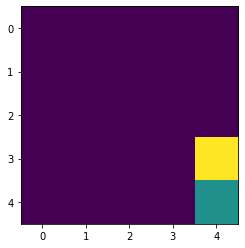

In [50]:
action = 0
observation, reward, done, _, agent_position,state = env.step1(action)
env.render1()
print('The reward for the action is: ', reward,'\n')

The reward for the action is:  10 



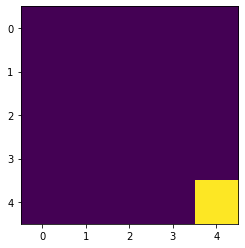

In [51]:
action = 0
observation, reward, done, _, agent_position,state = env.step1(action)
env.render1()
print('The reward for the action is: ', reward,'\n')

# **Q-LEARNING FOR DETERMINISTIC ENVIRONMENT**

In [78]:
def next_action(Q, epsilon, n_actions, state, evaluate=False): 
    if np.random.rand() < epsilon or evaluate:
        action = np.argmax(Q[state, :])
    else:
        action = env.action_space.sample()
    return action

def QL_deter_algorithm(alpha, gamma, epsilon, episodes, max_steps, n_tests, epsilon_decay, epsilon_min, showVisualization = False, evaluation=False, evaluation_hyper=False):
    #Chosing the grid environment
    env = GridEnvironment() #deterministic

    initial_states, firstActions = env.observation_space.n, env.action_space.n

    #Q-table
    Q = np.zeros((env.observation_space.n, env.action_space.n))#set to zeroes
    episode_total = []
    epsilon_total = []
    rewards = []
    for episode in range(episodes):
        episode_per_reward = 0
        episode_total.append(episode)
        state1 = env.reset().astype('int') 
        action1 = next_action(Q, epsilon, firstActions, state1)
        rand = 0 
        epsilon_total.append(epsilon)
        done = False #Initially set done value as false

        while rand < max_steps: 
            if showVisualization:
                env.render()
            observation, reward, done, info, agent_position,state = env.step(action1) 
            Q[state1, action1] += alpha * ( reward + (gamma * np.argmax(Q[observation.astype('int'),:])) - Q[state1, action1] ) #Update the Q-table
            state1 = observation.astype('int') #update our next actiona and state values
            rand += 1 
            episode_per_reward += reward #Update the reward per episode in the array
            if done:
                rewards.append(episode_per_reward)
                epsilon = max(epsilon * epsilon_decay, epsilon_min)
                break

    if evaluation: 
        rewards, episode_total = eval_func(Q, env, n_tests, firstActions)
        return rewards, episode_total
    if evaluation_hyper: 
        rewards_hyper, total_episode_hyper = eval_hyper_func(Q, env, n_tests, firstActions)
        return rewards_hyper, total_episode_hyper 
    else:
      return rewards, episode_total, epsilon_total 


def eval_func(Q, env, total_tests, actions):
    total_episode = []
    rewards = []
    count=0
    for test in range(total_tests):
        total_episode.append(test) 
        state1 = env.reset().astype('int') 
        done = False
        epsilon = 0
        total_reward = 0
        count+=1
        while True:
            action = next_action(Q, epsilon, actions, state1, evaluate=True) 
            observation, reward, done, info, agent_position, state = env.step(action) #Get the reward from the environment using the current action
            state1 = observation.astype('int')
            total_reward += reward #append the reward
            if done:
                rewards.append(total_reward)
                break
    return rewards, total_episode



def eval_hyper_func(Q, env, total_tests, actions): #function to evaluate the algorithm
    total_episode_hyper = []
    rewards_hyper = []
    for test in range(total_tests):
        total_episode_hyper.append(test)
        state1 = env.reset().astype('int') 
        done = False
        epsilon = 0
        total_reward = 0
        while True:
            action = next_action(Q, epsilon, actions, state1, evaluate=True) 
            observation, reward, done, info, agent_position, state = env.step(action) #Get the reward from the environment using the current action
            state1 = observation.astype('int')
            total_reward += reward 
            if done:
                rewards_hyper.append(total_reward)
                break
    return rewards_hyper, total_episode_hyper




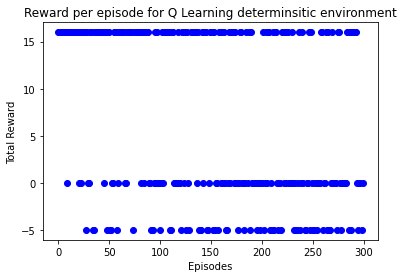

In [122]:
episodes = 300
max_steps = 420
epsilon_decay = 0.99
epsilon_min = 0.02
total_tests = 20
alpha = 0.7
gamma = 0.9 
epsilon = 1
timestep_reward, total_episode, total_epsilon = QL_deter_algorithm(alpha, gamma, epsilon, episodes, max_steps, total_tests, epsilon_decay, epsilon_min, False)

# plot the reward for each episode
plt.plot(total_episode, timestep_reward,'bo')
plt.title('Reward per episode')
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.show()

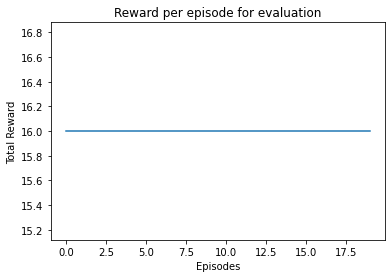

In [80]:
rewards_hyper, total_episode_hyper = QL_deter_algorithm(alpha, gamma, epsilon, episodes, max_steps, total_tests, epsilon_decay, epsilon_min, False, False, True)
# plot the reward for each episode for evaluation
plt.plot(total_episode_hyper, rewards_hyper)
plt.title('Reward per episode for evaluation ')
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.show()

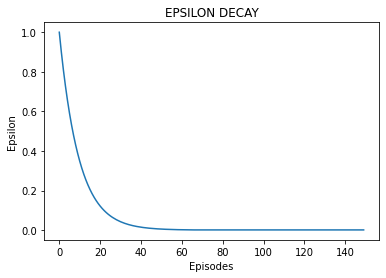

In [81]:
#epsilon decay
epsilon = 1
episodes = 150
max_steps = 420
epsilon_decay = 0.9
epsilon_min = 0.001
total_tests = 20
alpha = 0.8
gamma = 0.99
timestep_reward, total_episode, total_epsilon = QL_deter_algorithm(alpha, gamma, epsilon, episodes, max_steps, total_tests, epsilon_decay, epsilon_min, False)

plt.plot(total_episode,total_epsilon)
plt.title('EPSILON DECAY')
plt.xlabel("Episodes")
plt.ylabel("Epsilon")
plt.show()

# **Q-LEARNING FOR STOCHASTIC ENVIRONMENT**

In [86]:
def next_action1(Q, epsilon, n_actions, state, evaluate=False): 
    if np.random.rand() < epsilon or evaluate:
        action = np.argmax(Q[state, :])
    else:
        action = env.action_space.sample()
    return action

def QL_stoch_algorithm(alpha, gamma, epsilon, episodes, max_steps, n_tests, epsilon_decay, epsilon_min, showVisualization = False, evaluation=False, evaluation_hyper=False):
    #Chosing the grid environment
    env = GridEnvironment1() #stochastic

    initial_states, firstActions = env.observation_space.n, env.action_space.n

    #Q-table
    Q = np.zeros((env.observation_space.n, env.action_space.n))#set to zeroes
    episode_total = []
    epsilon_total = []
    rewards = []
    for episode in range(episodes):
        episode_per_reward = 0
        episode_total.append(episode)
        state1 = env.reset1().astype('int') 
        action1 = next_action1(Q, epsilon, firstActions, state1)
        rand = 0 
        epsilon_total.append(epsilon)
        done = False #Initially set done value as false

        while rand < max_steps: 
            if showVisualization: 
                env.render1()
            observation, reward, done, info, agent_position,state = env.step1(action1) #Get the reward value for this episode using the first action
            Q[state1, action1] += alpha * ( reward + (gamma * np.argmax(Q[observation.astype('int'),:])) - Q[state1, action1] ) #Update the Q-table using the current state, current action, new state, new action
            state1 = observation.astype('int') #update our next actiona and state values
            rand += 1 
            episode_per_reward += reward #Update the reward per episode in the array
            if done:
                rewards.append(episode_per_reward)
                epsilon = max(epsilon * epsilon_decay, epsilon_min)
                break

    if evaluation: 
        rewards, episode_total = eval_func1(Q, env, n_tests, firstActions)
        return rewards, episode_total
    if evaluation_hyper: 
        rewards_hyper, total_episode_hyper = eval_hyper_func1(Q, env, n_tests, firstActions)
        return rewards_hyper, total_episode_hyper 
    else:
      return rewards, episode_total, epsilon_total 


def eval_func1(Q, env, total_tests, actions):
    total_episode = []
    rewards = []
    count=0
    for test in range(total_tests):
        total_episode.append(test) 
        state1 = env.reset1().astype('int') 
        #done is false and reward value is 0 initially
        done = False
        epsilon = 0
        total_reward = 0
        count+=1
        while True:
            action = next_action1(Q, epsilon, actions, state1, evaluate=True)
            observation, reward, done, info, agent_position, state = env.step1(action)
            state1 = observation.astype('int')
            total_reward += reward #append the reward
            if done:
                rewards.append(total_reward)
                break
    return rewards, total_episode



def eval_hyper_func1(Q, env, total_tests, actions): 
    total_episode_hyper = []
    rewards_hyper = []
    for test in range(total_tests):
        total_episode_hyper.append(test)
        state1 = env.reset1().astype('int') 
        done = False
        epsilon = 0
        total_reward = 0
        while True:
            action = next_action1(Q, epsilon, actions, state1, evaluate=True)
            observation, reward, done, info, agent_position, state = env.step1(action) #Get the reward from the environment using the current action
            state1 = observation.astype('int')
            total_reward += reward 
            if done:
                rewards_hyper.append(total_reward)
                break
    return rewards_hyper, total_episode_hyper




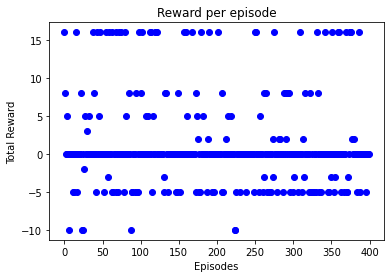

In [96]:
episodes = 400
max_steps = 420
epsilon_decay = 0.4
epsilon_min = 0.02
total_tests = 20
alpha = 0.9
gamma = 0.9 
epsilon = 1
timestep_reward, total_episode, total_epsilon = QL_stoch_algorithm(alpha, gamma, epsilon, episodes, max_steps, total_tests, epsilon_decay, epsilon_min, False)

# plot the reward for each episode
plt.plot(total_episode, timestep_reward,'bo')
plt.title('Reward per episode')
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.show()

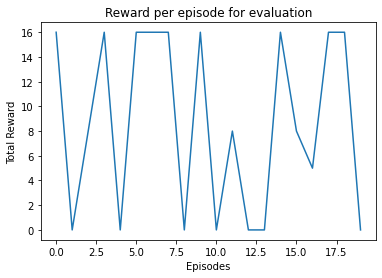

In [90]:
rewards_hyper, total_episode_hyper = QL_stoch_algorithm(alpha, gamma, epsilon, episodes, max_steps, total_tests, epsilon_decay, epsilon_min, False, False, True)
# plot the reward for each episode for evaluation
plt.plot(total_episode_hyper, rewards_hyper)
plt.title('Reward per episode for evaluation')
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.show()

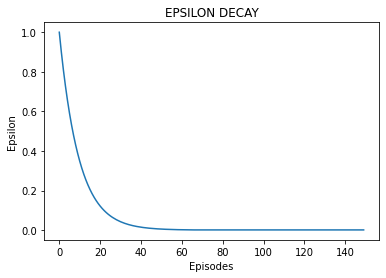

In [89]:
#epsilon decay
epsilon = 1
episodes = 150
max_steps = 420
epsilon_decay = 0.9
epsilon_min = 0.001
total_tests = 20
alpha = 0.8
gamma = 0.99
timestep_reward, total_episode, total_epsilon = QL_stoch_algorithm(alpha, gamma, epsilon, episodes, max_steps, total_tests, epsilon_decay, epsilon_min, False)

plt.plot(total_episode,total_epsilon)
plt.title('EPSILON DECAY')
plt.xlabel("Episodes")
plt.ylabel("Epsilon")
plt.show()

# **SARSA ALGORITHM FOR DETERMINISTIC ENVIRONMENT**

In [123]:
def next_action(Q, epsilon, n_actions, state, evaluate=False): 
    if np.random.rand() < epsilon or evaluate:
        action = np.argmax(Q[state, :])
    else:
        action = env.action_space.sample()
    return action

def sarsa_deter_algorithm(alpha, gamma, epsilon, episodes, max_steps, n_tests, epsilon_decay, epsilon_min, showVisualization = False, evaluation=False, evaluation_hyper=False):
    #Chosing the grid environment
    env = GridEnvironment() #deterministic

    initial_states, firstActions = env.observation_space.n, env.action_space.n

    #Q-table
    Q = np.zeros((env.observation_space.n, env.action_space.n))#set to zeroes
    episode_total = []
    epsilon_total = []
    rewards = []
    for episode in range(episodes):
        episode_per_reward = 0
        episode_total.append(episode)
        state1 = env.reset().astype('int') 
        action1 = next_action(Q, epsilon, firstActions, state1)
        rand = 0 
        epsilon_total.append(epsilon)
        done = False #Initially set done value as false

        while rand < max_steps: 
            if showVisualization: 
                env.render()
            observation, reward, done, info, agent_position,state = env.step(action1) 
            action2 = next_action(Q, epsilon, firstActions, observation.astype('int'))
            Q[state1, action1] += alpha * ( reward + (gamma * Q[observation.astype('int'),action2]) - Q[state1, action1] ) 
            state1, action1 = observation.astype('int'), action2 #update our next actiona and state values
            rand += 1 
            episode_per_reward += reward #Update the reward per episode in the array
            if done:
                rewards.append(episode_per_reward) #append the reqard value in the array after each episode
                epsilon = max(epsilon * epsilon_decay, epsilon_min)
                break

    if evaluation: 
        rewards, episode_total = eval_func(Q, env, n_tests, firstActions)
        return rewards, episode_total
    if evaluation_hyper: 
        rewards_hyper, total_episode_hyper = eval_hyper_func(Q, env, n_tests, firstActions)
        return rewards_hyper, total_episode_hyper 
    else:
      return rewards, episode_total, epsilon_total 

#evaluation function
def eval_func(Q, env, total_tests, actions):
    total_episode = []
    rewards = []
    count=0
    for test in range(total_tests):
        total_episode.append(test) 
        state1 = env.reset().astype('int') 
        #done is false and reward value is 0 initially
        done = False
        epsilon = 0
        total_reward = 0
        count+=1
        while True:
            action = next_action(Q, epsilon, actions, state1, evaluate=True) 
            observation, reward, done, info, agent_position, state = env.step(action) 
            state1 = observation.astype('int')
            total_reward += reward #append the reward
            if done:
                rewards.append(total_reward)
                break
    return rewards, total_episode



def eval_hyper_func(Q, env, total_tests, actions): #function to evaluate the algorithm
    total_episode_hyper = []
    rewards_hyper = []
    for test in range(total_tests):
        total_episode_hyper.append(test)
        state1 = env.reset().astype('int') 
        done = False
        epsilon = 0
        total_reward = 0
        while True:
            action = next_action(Q, epsilon, actions, state1, evaluate=True) 
            observation, reward, done, info, agent_position, state = env.step(action) #Get the reward from the environment using the current action
            state1 = observation.astype('int')
            total_reward += reward 
            if done:
                rewards_hyper.append(total_reward)
                break
    return rewards_hyper, total_episode_hyper




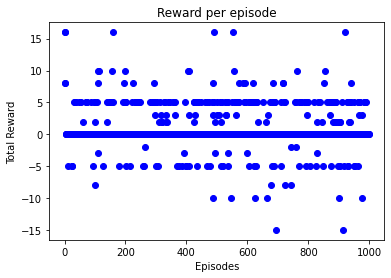

In [112]:
episodes = 1000
max_steps = 420
epsilon_decay = 0.9
epsilon_min = 0.2
total_tests = 20
alpha = 0.4
gamma = 0.4
epsilon = 1
timestep_reward, total_episode, total_epsilon = sarsa_deter_algorithm(alpha, gamma, epsilon, episodes, max_steps, total_tests, epsilon_decay, epsilon_min, False)

# plot the reward for each episode
plt.plot(total_episode, timestep_reward,'bo')
plt.title('Reward per episode')
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.show()

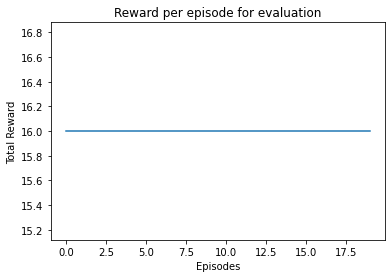

In [111]:
rewards_hyper, total_episode_hyper = sarsa_deter_algorithm(alpha, gamma, epsilon, episodes, max_steps, total_tests, epsilon_decay, epsilon_min, False, False, True)
# plot the reward for each episode for evaluation
plt.plot(total_episode_hyper, rewards_hyper)
plt.title('Reward per episode for evaluation')
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.show()

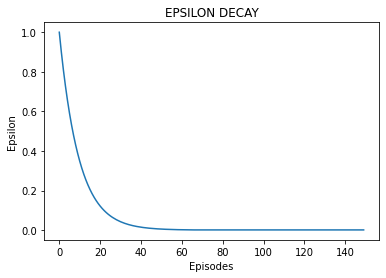

In [113]:
#epsilon decay
epsilon = 1
episodes = 150
max_steps = 420
epsilon_decay = 0.9
epsilon_min = 0.001
total_tests = 20
alpha = 0.8
gamma = 0.99
timestep_reward, total_episode, total_epsilon = sarsa_deter_algorithm(alpha, gamma, epsilon, episodes, max_steps, total_tests, epsilon_decay, epsilon_min, False)

plt.plot(total_episode,total_epsilon)
plt.title('EPSILON DECAY')
plt.xlabel("Episodes")
plt.ylabel("Epsilon")
plt.show()

# **SARSA ALGORITHM FOR STOCHASTIC ENVIRONMENT**

In [115]:
def next_action1(Q, epsilon, n_actions, state, evaluate=False): 
    if np.random.rand() < epsilon or evaluate:
        action = np.argmax(Q[state, :])
    else:
        action = env.action_space.sample()
    return action

def sarsa_stoch_algorithm(alpha, gamma, epsilon, episodes, max_steps, n_tests, epsilon_decay, epsilon_min, showVisualization = False, evaluation=False, evaluation_hyper=False):
    #Chosing the grid environment
    env = GridEnvironment1() #deterministic

    initial_states, firstActions = env.observation_space.n, env.action_space.n

    #Q-table
    Q = np.zeros((env.observation_space.n, env.action_space.n))#set to zeroes
    episode_total = []
    epsilon_total = []
    rewards = []
    for episode in range(episodes):
        episode_per_reward = 0
        episode_total.append(episode)
        state1 = env.reset1().astype('int') 
        action1 = next_action1(Q, epsilon, firstActions, state1)
        rand = 0 
        epsilon_total.append(epsilon)
        done = False #Initially set done value as false

        while rand < max_steps: 
            if showVisualization: #showVisualization is set to show the visual representation of the grid
                env.render1()
            observation, reward, done, info, agent_position,state = env.step1(action1)
            action2 = next_action(Q, epsilon, firstActions, observation.astype('int'))
            Q[state1, action1] += alpha * ( reward + (gamma * Q[observation.astype('int'),action2]) - Q[state1, action1] ) #Update the Q-table using the current state, current action, new state, new action
            state1, action1 = observation.astype('int'), action2
            rand += 1 
            episode_per_reward += reward #Update the reward per episode in the array
            if done:
                rewards.append(episode_per_reward) #append the reqard value in the array after each episode
                # calculate the apsilon value for each episode
                epsilon = max(epsilon * epsilon_decay, epsilon_min)
                break

    if evaluation: 
        rewards, episode_total = eval_func1(Q, env, n_tests, firstActions)
        return rewards, episode_total
    if evaluation_hyper: 
        rewards_hyper, total_episode_hyper = eval_hyper_func1(Q, env, n_tests, firstActions)
        return rewards_hyper, total_episode_hyper 
    else:
      return rewards, episode_total, epsilon_total 


def eval_func1(Q, env, total_tests, actions):
    total_episode = []
    rewards = []
    count=0
    for test in range(total_tests):
        total_episode.append(test) 
        state1 = env.reset1().astype('int') 
        #done is false and reward value is 0 initially
        done = False
        epsilon = 0
        total_reward = 0
        count+=1
        while True:
            action = next_action1(Q, epsilon, actions, state1, evaluate=True) 
            observation, reward, done, info, agent_position, state = env.step1(action) 
            state1 = observation.astype('int')
            total_reward += reward #append the reward
            if done:
                rewards.append(total_reward)
                break
    return rewards, total_episode



def eval_hyper_func1(Q, env, total_tests, actions): #function to evaluate the algorithm
    total_episode_hyper = []
    rewards_hyper = []
    for test in range(total_tests):
        total_episode_hyper.append(test)
        state1 = env.reset1().astype('int') 
        done = False
        epsilon = 0
        total_reward = 0
        while True:
            action = next_action1(Q, epsilon, actions, state1, evaluate=True) 
            observation, reward, done, info, agent_position, state = env.step1(action) #Get the reward from the environment using the current action
            state1 = observation.astype('int')
            total_reward += reward 
            if done:
                rewards_hyper.append(total_reward)
                break
    return rewards_hyper, total_episode_hyper




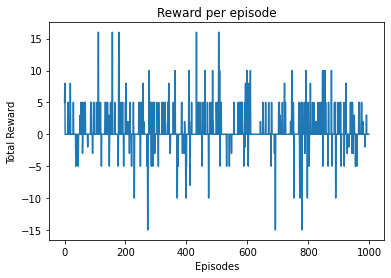

In [117]:
episodes = 1000
max_steps = 420
epsilon_decay = 0.9
epsilon_min = 0.2
total_tests = 20
alpha = 0.4
gamma = 0.4
epsilon = 1
timestep_reward, total_episode, total_epsilon = sarsa_stoch_algorithm(alpha, gamma, epsilon, episodes, max_steps, total_tests, epsilon_decay, epsilon_min, False)

# plot the reward for each episode
plt.plot(total_episode, timestep_reward)
plt.title('Reward per episode')
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.show()

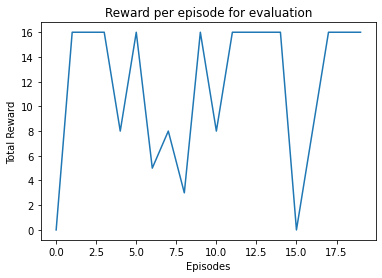

In [119]:
rewards_hyper, total_episode_hyper = sarsa_stoch_algorithm(alpha, gamma, epsilon, episodes, max_steps, total_tests, epsilon_decay, epsilon_min, False, False, True)
# plot the reward for each episode for evaluation
plt.plot(total_episode_hyper, rewards_hyper)
plt.title('Reward per episode for evaluation')
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.show()

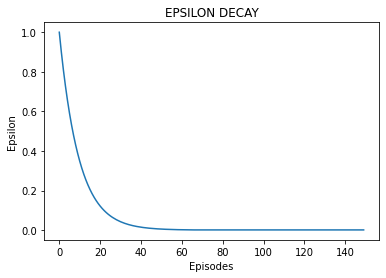

In [121]:
#epsilon decay
epsilon = 1
episodes = 150
max_steps = 420
epsilon_decay = 0.9
epsilon_min = 0.001
total_tests = 20
alpha = 0.8
gamma = 0.99
timestep_reward, total_episode, total_epsilon = sarsa_stoch_algorithm(alpha, gamma, epsilon, episodes, max_steps, total_tests, epsilon_decay, epsilon_min, False)

plt.plot(total_episode,total_epsilon)
plt.title('EPSILON DECAY')
plt.xlabel("Episodes")
plt.ylabel("Epsilon")
plt.show()

# **HYPERPARAMETER TUNING FOR SARSA DETERMINISTIC**

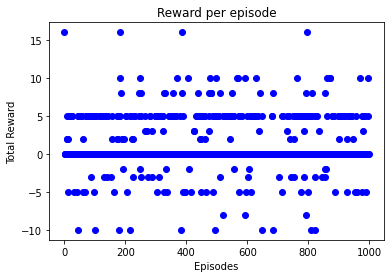

In [137]:
#epsilon decay 0.6
episodes = 1000
max_steps = 420
epsilon_decay = 0.6
epsilon_min = 0.2
total_tests = 20
alpha = 0.4
gamma = 0.4
epsilon = 1
timestep_reward, total_episode, total_epsilon = sarsa_deter_algorithm(alpha, gamma, epsilon, episodes, max_steps, total_tests, epsilon_decay, epsilon_min, False)

# plot the reward for each episode
plt.plot(total_episode, timestep_reward,'bo')
plt.title('Reward per episode')
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.show()

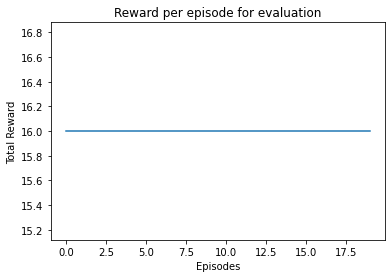

In [138]:
rewards_hyper, total_episode_hyper = sarsa_deter_algorithm(alpha, gamma, epsilon, episodes, max_steps, total_tests, epsilon_decay, epsilon_min, False, False, True)
# plot the reward for each episode for evaluation
plt.plot(total_episode_hyper, rewards_hyper)
plt.title('Reward per episode for evaluation')
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.show()

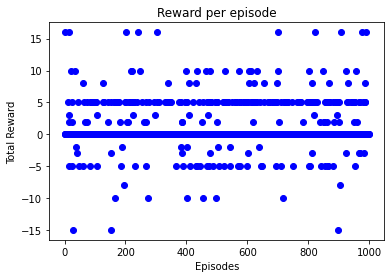

In [139]:
#epsilon decay 0.4
episodes = 1000
max_steps = 420
epsilon_decay = 0.4
epsilon_min = 0.2
total_tests = 20
alpha = 0.4
gamma = 0.4
epsilon = 1
timestep_reward, total_episode, total_epsilon = sarsa_deter_algorithm(alpha, gamma, epsilon, episodes, max_steps, total_tests, epsilon_decay, epsilon_min, False)

# plot the reward for each episode
plt.plot(total_episode, timestep_reward,'bo')
plt.title('Reward per episode')
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.show()

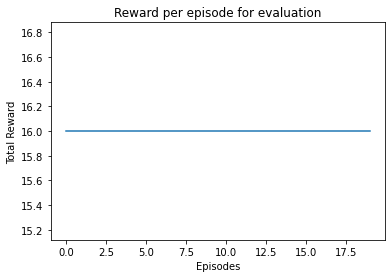

In [140]:
rewards_hyper, total_episode_hyper = sarsa_deter_algorithm(alpha, gamma, epsilon, episodes, max_steps, total_tests, epsilon_decay, epsilon_min, False, False, True)
# plot the reward for each episode for evaluation
plt.plot(total_episode_hyper, rewards_hyper)
plt.title('Reward per episode for evaluation')
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.show()

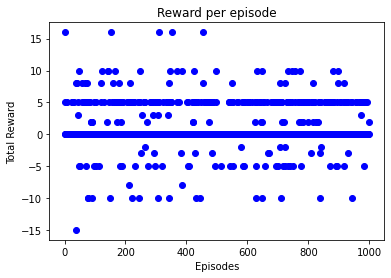

In [141]:
#epsilon decay 0.1
episodes = 1000
max_steps = 420
epsilon_decay = 0.1
epsilon_min = 0.2
total_tests = 20
alpha = 0.4
gamma = 0.4
epsilon = 1
timestep_reward, total_episode, total_epsilon = sarsa_deter_algorithm(alpha, gamma, epsilon, episodes, max_steps, total_tests, epsilon_decay, epsilon_min, False)

# plot the reward for each episode
plt.plot(total_episode, timestep_reward,'bo')
plt.title('Reward per episode')
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.show()

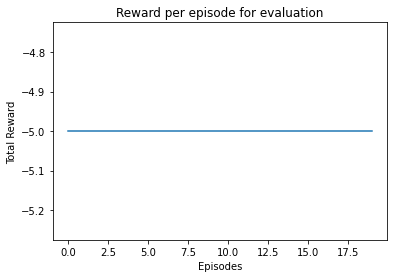

In [142]:
rewards_hyper, total_episode_hyper = sarsa_deter_algorithm(alpha, gamma, epsilon, episodes, max_steps, total_tests, epsilon_decay, epsilon_min, False, False, True)
# plot the reward for each episode for evaluation
plt.plot(total_episode_hyper, rewards_hyper)
plt.title('Reward per episode for evaluation')
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.show()

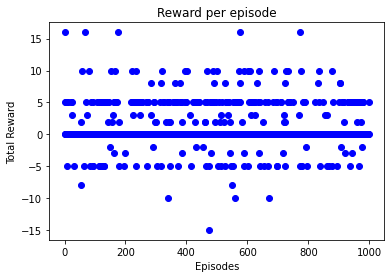

In [143]:
#discount factor 0.3
episodes = 1000
max_steps = 420
epsilon_decay = 0.4
epsilon_min = 0.2
total_tests = 20
alpha = 0.4
gamma = 0.3
epsilon = 1
timestep_reward, total_episode, total_epsilon = sarsa_deter_algorithm(alpha, gamma, epsilon, episodes, max_steps, total_tests, epsilon_decay, epsilon_min, False)

# plot the reward for each episode
plt.plot(total_episode, timestep_reward,'bo')
plt.title('Reward per episode')
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.show()

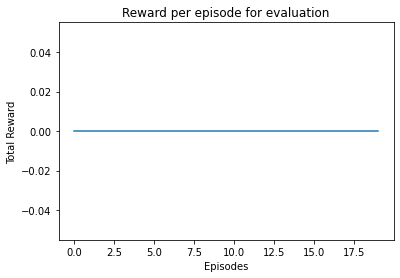

In [144]:
rewards_hyper, total_episode_hyper = sarsa_deter_algorithm(alpha, gamma, epsilon, episodes, max_steps, total_tests, epsilon_decay, epsilon_min, False, False, True)
# plot the reward for each episode for evaluation
plt.plot(total_episode_hyper, rewards_hyper)
plt.title('Reward per episode for evaluation')
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.show()

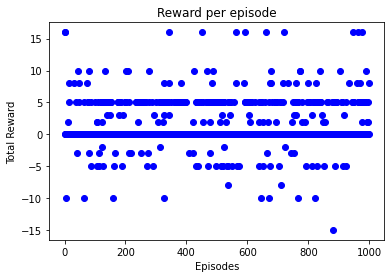

In [145]:
#discount factor 0.55
episodes = 1000
max_steps = 420
epsilon_decay = 0.4
epsilon_min = 0.2
total_tests = 20
alpha = 0.4
gamma = 0.55
epsilon = 1
timestep_reward, total_episode, total_epsilon = sarsa_deter_algorithm(alpha, gamma, epsilon, episodes, max_steps, total_tests, epsilon_decay, epsilon_min, False)

# plot the reward for each episode
plt.plot(total_episode, timestep_reward,'bo')
plt.title('Reward per episode')
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.show()

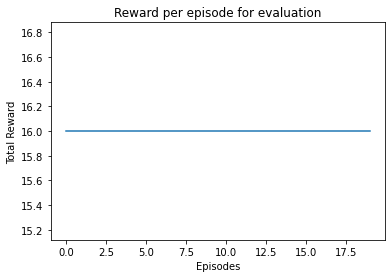

In [146]:
rewards_hyper, total_episode_hyper = sarsa_deter_algorithm(alpha, gamma, epsilon, episodes, max_steps, total_tests, epsilon_decay, epsilon_min, False, False, True)
# plot the reward for each episode for evaluation
plt.plot(total_episode_hyper, rewards_hyper)
plt.title('Reward per episode for evaluation')
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.show()

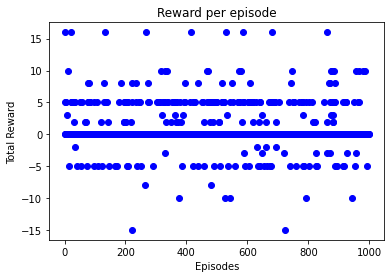

In [147]:
#discount factor 0.65
episodes = 1000
max_steps = 420
epsilon_decay = 0.4
epsilon_min = 0.2
total_tests = 20
alpha = 0.4
gamma = 0.55
epsilon = 1
timestep_reward, total_episode, total_epsilon = sarsa_deter_algorithm(alpha, gamma, epsilon, episodes, max_steps, total_tests, epsilon_decay, epsilon_min, False)

# plot the reward for each episode
plt.plot(total_episode, timestep_reward,'bo')
plt.title('Reward per episode')
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.show()

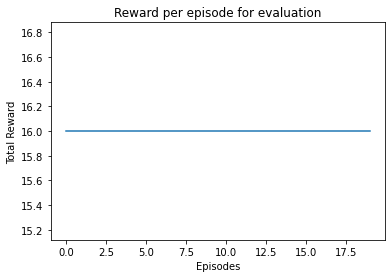

In [148]:
rewards_hyper, total_episode_hyper = sarsa_deter_algorithm(alpha, gamma, epsilon, episodes, max_steps, total_tests, epsilon_decay, epsilon_min, False, False, True)
# plot the reward for each episode for evaluation
plt.plot(total_episode_hyper, rewards_hyper)
plt.title('Reward per episode for evaluation')
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.show()